In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


5. How many rows and columns are in gdp_df?

In [7]:
gdp_df.shape

(8219, 4)

8219 rows, 4 columns

5. b. What are the data types of each column?

In [10]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


Country or Area type is object, 
Year type is int64, 
Value type is float64, 
Value Footnotes type is float64

6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp = gdp_df.drop(columns = ['Value Footnotes'])

In [14]:
gdp.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [15]:
gdp.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [17]:
gdp.Country.value_counts()

Country
Latvia                       34
North America                34
Mongolia                     34
Morocco                      34
Mozambique                   34
                             ..
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, Length: 247, dtype: int64

In [18]:
countries = gdp.Country.value_counts()

In [19]:
year_count = countries.to_frame()

In [20]:
year_count.head()

,count
Country,
Latvia,34
North America,34
Mongolia,34
Morocco,34
Mozambique,34


In [21]:
gdp.Year.value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

there are only 31 years in the dataset, but a lot of countries have 34 entries

In [23]:
year_count.value_counts()

count
34       228
33         5
16         2
24         2
11         1
13         1
15         1
18         1
21         1
26         1
27         1
29         1
30         1
32         1
Name: count, dtype: int64

234 countries have data for all years (there are 31 years in the dataset, so I'm counting every country with at least 31 entries)

In [25]:
year_count.tail()

,count
Country,
Faroe Islands,16
Kosovo,16
Sint Maarten (Dutch part),15
Turks and Caicos Islands,13
Djibouti,11


Faroe Islands, Kosovo, Sint Maarten (Dutch part), Turks and Caicos Islands, and Djibouti are all missing many years of data

8. Create some plots to show the distribution of GDP per capita for the year 2020. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [28]:
gdp_2020 = gdp.loc[gdp.Year == 2020]

In [29]:
gdp_2020.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748


In [30]:
gdp_2020 = gdp_2020.reset_index(drop=True)

In [31]:
gdp_2020.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,2769.685745
1,Africa Eastern and Southern,2020,3861.111238
2,Africa Western and Central,2020,4622.731427
3,Albania,2020,14650.395929
4,Algeria,2020,14194.155748


Text(0.5, 1.0, 'Distribution of GDP Per Capita 2020')

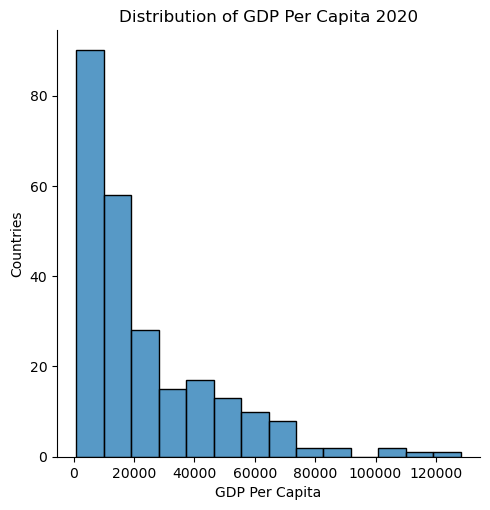

In [32]:
sns.displot(x = gdp_2020.GDP_Per_Capita)
plt.xlabel('GDP Per Capita')
plt.ylabel('Countries')
plt.title('Distribution of GDP Per Capita 2020')

Text(0.5, 1.0, 'Distribution of GDP per Capita 2020')

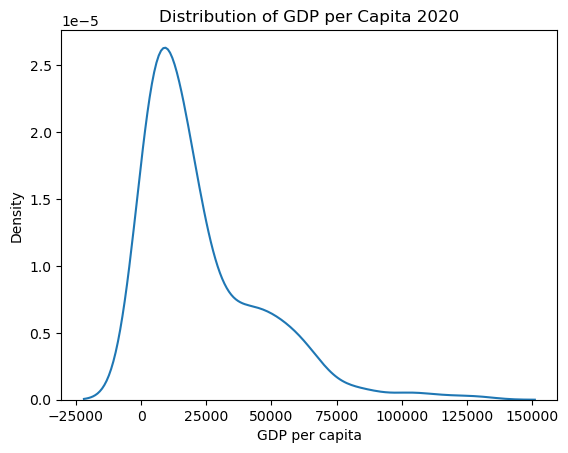

In [33]:
sns.kdeplot(x = gdp_2020.GDP_Per_Capita)
plt.xlabel('GDP per capita')
plt.ylabel('Density')
plt.title('Distribution of GDP per Capita 2020')

why does the density chart have negative GDP??

Text(0.5, 1.0, 'Distribution of GDP per Capita 2020')

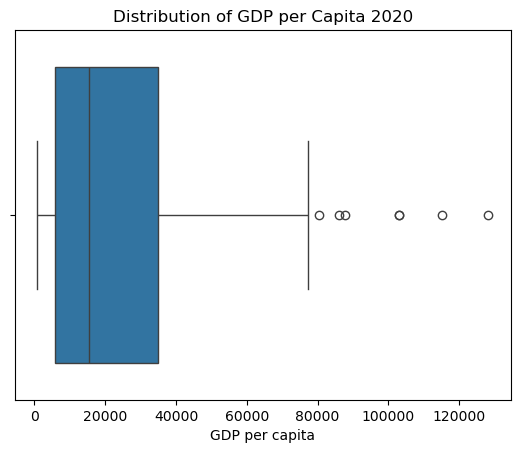

In [35]:
sns.boxplot(x = gdp_2020.GDP_Per_Capita)
plt.xlabel('GDP per capita')
plt.title('Distribution of GDP per Capita 2020')

Text(0.5, 1.0, 'GDP Distribution per Capita 2020')

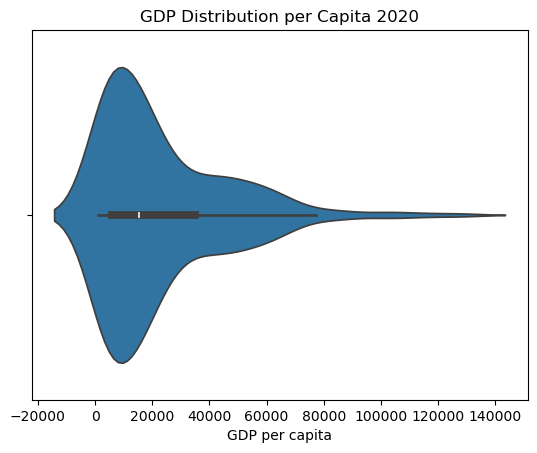

In [36]:
sns.violinplot(x = gdp_2020.GDP_Per_Capita)
plt.xlabel('GDP per capita')
plt.title('GDP Distribution per Capita 2020')

this one has negative GDP too??

I think the box plot is the best out of these 4. It shows the quartiles as well as the distribution, and pinpoints outliers (unlike the other 3 graphs).

9. What was the median GDP per capita value in 2020?

In [40]:
gdp_2020.describe()

,Year,GDP_Per_Capita
count,247.0,247.000000
mean,2020.0,23044.942556
std,0.0,22856.889868
min,2020.0,833.920257
25%,2020.0,5857.324918
50%,2020.0,15309.235988
75%,2020.0,34823.614188
max,2020.0,128256.560341


the median GDP per capita in 2020 is $15,309.24

10. Create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

    A boxplot, 
    A barplot, 
    A scatterplot, 
    A scatterplot with a trend line overlaid
    
    Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [43]:
decades = [1990, 2000, 2010, 2020]
gdp_decades = gdp.loc[gdp.Year.isin(decades)]

In [44]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012


In [45]:
gdp_decades = gdp_decades.reset_index(drop=True)

In [46]:
gdp_decades.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,2769.685745
1,Afghanistan,2010,2848.586061
2,Afghanistan,2000,1617.826475
3,Africa Eastern and Southern,2020,3861.111238
4,Africa Eastern and Southern,2010,3863.836012


Text(0.5, 1.0, 'GDP Per Capita at the Start of Each Decade')

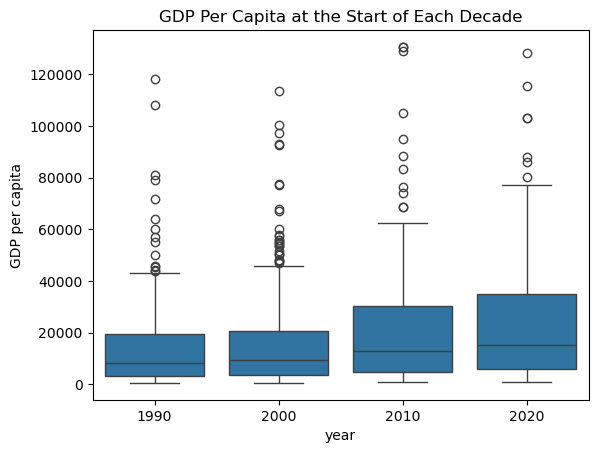

In [47]:
sns.boxplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('GDP Per Capita at the Start of Each Decade')

Text(0.5, 1.0, 'GDP Per Capita at the Start of Each Decade')

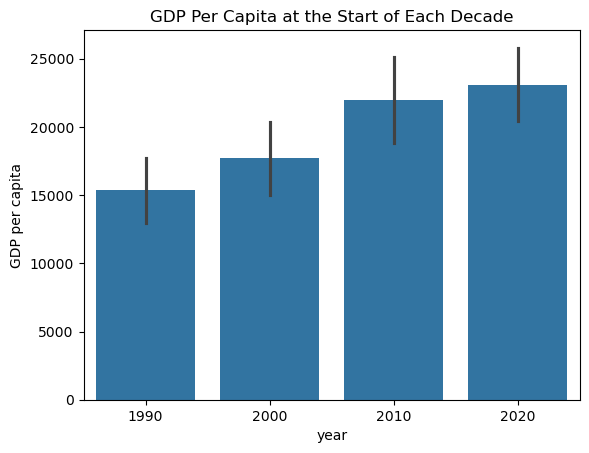

In [48]:
sns.barplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('GDP Per Capita at the Start of Each Decade')

Text(0.5, 1.0, 'GDP Per Capita at the Start of Each Decade')

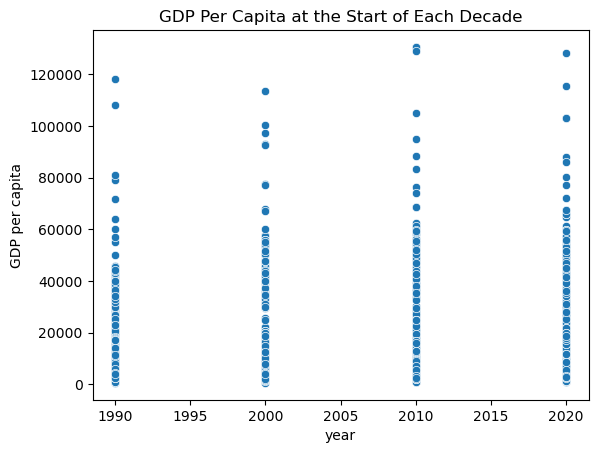

In [49]:
sns.scatterplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('GDP Per Capita at the Start of Each Decade')

Text(0.5, 1.0, 'GDP Per Capita at the Start of Each Decade')

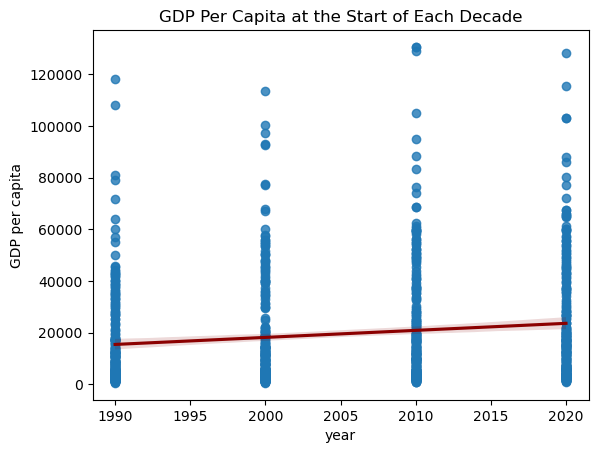

In [50]:
sns.regplot(data = gdp_decades, x = 'Year', y = 'GDP_Per_Capita', line_kws = {"color": "darkred"})
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('GDP Per Capita at the Start of Each Decade')

The GDP per capita has increased over time. Again, I like the box plot because it visualizes the distribution of the data better and shows the outliers. I think the bar chart is too simple, which ironically makes it harder to interpret. I think the scatterplot would work better if we were looking at how the GDP per capita correlates to a different variable besides time, like population or country size. The trend line makes it easier to see the increase over time, but you can see that trend without a line in the boxplot and the bar chart.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [53]:
gdp = gdp.astype({'GDP_Per_Capita': int})

In [54]:
gdp.dtypes

Country           object
Year               int64
GDP_Per_Capita     int32
dtype: object

In [55]:
gdp.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992
1,Afghanistan,2022,1981
2,Afghanistan,2021,2144
3,Afghanistan,2020,2769
4,Afghanistan,2019,2927


In [56]:
gdp_over100000 = gdp.loc[gdp.GDP_Per_Capita >= 100000]

In [57]:
gdp_over100000

,Country,Year,GDP_Per_Capita
750,Bermuda,2011,101174
751,Bermuda,2010,105121
752,Bermuda,2009,108091
753,Bermuda,2008,115015
754,Bermuda,2007,117742
...,...,...,...
7821,United Arab Emirates,1996,100563
7822,United Arab Emirates,1995,101412
7825,United Arab Emirates,1992,101100
7826,United Arab Emirates,1991,103098


In [58]:
gdp_over100000.sort_values(by = 'Year', ascending = True)

,Country,Year,GDP_Per_Capita
7827,United Arab Emirates,1990,108057
974,Brunei,1990,118163
7826,United Arab Emirates,1991,103098
973,Brunei,1991,118220
7825,United Arab Emirates,1992,101100
...,...,...,...
6116,Qatar,2023,116159
4457,"Macao SAR, China",2023,104961
6511,Singapore,2023,127543
4423,Luxembourg,2023,130373


United Arab Emirates and Brunei were the first countries to have a GDP per capita over $100,000

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [61]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
133,Luxembourg,2020,128256.560341
195,Singapore,2020,115304.149459
183,Qatar,2020,103061.913414
105,Ireland,2020,102989.787335
22,Bermuda,2020,87894.401174
...,...,...,...
154,Mozambique,2020,1466.124765
201,Somalia,2020,1396.053436
52,Dem. Rep. Congo,2020,1277.632863
39,Central African Republic,2020,1136.570530


Luxembourg had the highest GDP per capita in 2020

In [63]:
gdp_lux = gdp.loc[gdp.Country == 'Luxembourg']

In [64]:
gdp_lux

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373
4424,Luxembourg,2022,134507
4425,Luxembourg,2021,135379
4426,Luxembourg,2020,128256
4427,Luxembourg,2019,131609
4428,Luxembourg,2018,130415
4429,Luxembourg,2017,131353
4430,Luxembourg,2016,132836
4431,Luxembourg,2015,129293
4432,Luxembourg,2014,129443


Text(0.5, 1.0, 'Luxembourg GDP Per Capita Over Time')

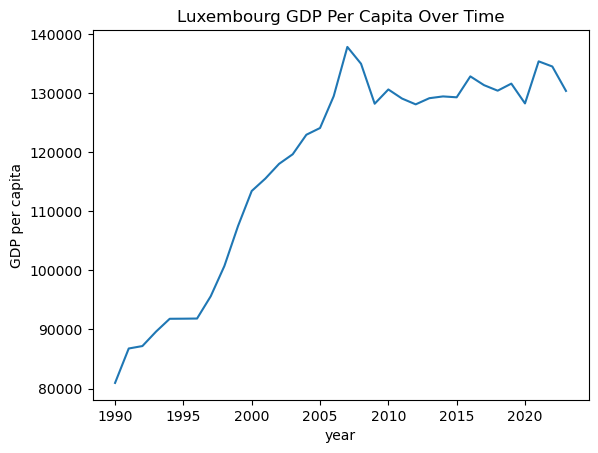

In [65]:
sns.lineplot(data = gdp_lux, x = 'Year', y = 'GDP_Per_Capita')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('Luxembourg GDP Per Capita Over Time')

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [67]:
gdp_2020.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita
31,Burundi,2020,833.920257
39,Central African Republic,2020,1136.570530
52,Dem. Rep. Congo,2020,1277.632863
201,Somalia,2020,1396.053436
154,Mozambique,2020,1466.124765
...,...,...,...
22,Bermuda,2020,87894.401174
105,Ireland,2020,102989.787335
183,Qatar,2020,103061.913414
195,Singapore,2020,115304.149459


Now that I'm looking at it, I realize I didn't need to sort this again in ascending order. I could have just looked at the bottom of the output when I sorted in descending order. Anyway, the country with the lowest GDP per capita in 2020 was Burundi.

In [69]:
gdp_bur = gdp.loc[gdp.Country == 'Burundi']

In [70]:
gdp_bur

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828
1044,Burundi,2022,829
1045,Burundi,2021,836
1046,Burundi,2020,833
1047,Burundi,2019,855
1048,Burundi,2018,868
1049,Burundi,2017,880
1050,Burundi,2016,897
1051,Burundi,2015,918
1052,Burundi,2014,977


Text(0.5, 1.0, 'Burundi GDP Per Capita Over Time')

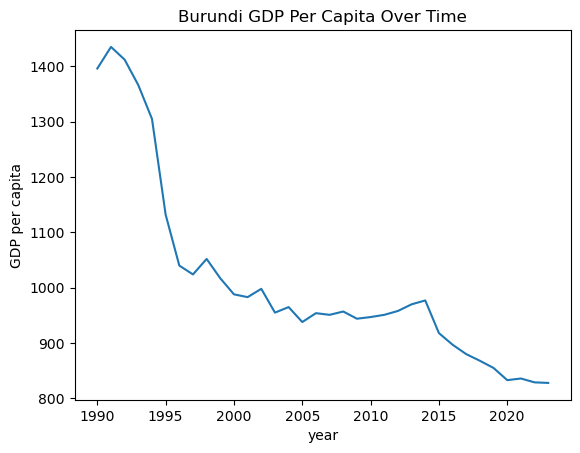

In [71]:
sns.lineplot(data = gdp_bur, x = 'Year', y = 'GDP_Per_Capita')
plt.xlabel('year')
plt.ylabel('GDP per capita')
plt.title('Burundi GDP Per Capita Over Time')

14. Read in the internet use dataset into a DataFrame named internet_df. Once you are able to read it in, take a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [73]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [74]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [75]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [76]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [78]:
internet = internet_df.drop(columns = ['Value Footnotes'])

In [79]:
internet.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [80]:
internet.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

In [82]:
internet.Year.value_counts()

Year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

The number of countries counted is not the same year to year, which means some countries are missing data.

17. What is the first year to have a non-zero internet users percentage value?

In [85]:
internet_non0 = internet.loc[internet.Internet_Users_Pct > 0]

In [86]:
internet_non0

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6077,Zimbabwe,1998,0.081648
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684


In [87]:
internet_non0.sort_values (by = 'Year', ascending = True)

,Country,Year,Internet_Users_Pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294
306,Australia,1990,0.585095
2034,France,1990,0.052778
339,Austria,1990,0.130369
...,...,...,...
427,Bangladesh,2023,44.502700
677,Bosnia and Herzegovina,2023,83.377200
1656,Ecuador,2023,72.694300
1537,Denmark,2023,98.775600


1990 is the first year to have a non-zero percentage of internet users.

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [90]:
internet_2000 = internet.loc[internet.Year == 2000]

In [91]:
internet_2000

,Country,Year,Internet_Users_Pct
42,Albania,2000,0.114097
71,Algeria,2000,0.491706
100,Andorra,2000,10.538800
128,Angola,2000,0.105046
150,Anguilla,2000,22.405400
...,...,...,...
5974,Virgin Islands (US),2000,13.815100
5994,Wallis and Futuna,2000,4.768070
6017,Yemen,2000,0.082500
6045,Zambia,2000,0.191072


In [92]:
internet_2014 = internet.loc[internet.Year == 2014]

In [93]:
internet_2014

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.0000
28,Albania,2014,54.3000
57,Algeria,2014,29.5000
87,Andorra,2014,86.1000
114,Angola,2014,21.3623
...,...,...,...
5937,Viet Nam,2014,41.0000
5960,Virgin Islands (US),2014,50.0700
6003,Yemen,2014,22.5500
6031,Zambia,2014,6.5000


In [94]:
compare_internet = pd.merge(internet_2000, internet_2014, on = 'Country', how = 'inner')

In [95]:
compare_internet.head()

,Country,Year_x,Internet_Users_Pct_x,Year_y,Internet_Users_Pct_y
0,Albania,2000,0.114097,2014,54.3000
1,Algeria,2000,0.491706,2014,29.5000
2,Andorra,2000,10.538800,2014,86.1000
3,Angola,2000,0.105046,2014,21.3623
4,Anguilla,2000,22.405400,2014,70.3900


In [96]:
compare_internet = compare_internet.drop(columns = 'Year_x')

In [97]:
compare_internet = compare_internet.drop(columns = 'Year_y')

In [98]:
compare_internet.head()

,Country,Internet_Users_Pct_x,Internet_Users_Pct_y
0,Albania,0.114097,54.3000
1,Algeria,0.491706,29.5000
2,Andorra,10.538800,86.1000
3,Angola,0.105046,21.3623
4,Anguilla,22.405400,70.3900


In [99]:
compare_internet.columns = ['Country', '2000', '2014']

In [100]:
compare_internet.head()

,Country,2000,2014
0,Albania,0.114097,54.3000
1,Algeria,0.491706,29.5000
2,Andorra,10.538800,86.1000
3,Angola,0.105046,21.3623
4,Anguilla,22.405400,70.3900


Text(0.5, 1.0, 'Percentage of Internet Users in 2000 vs. 2014')

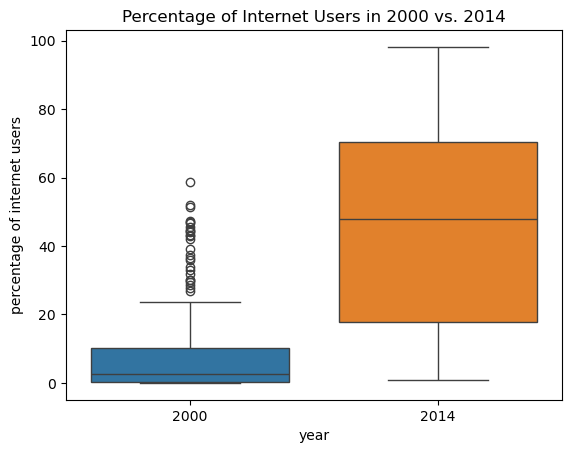

In [101]:
sns.boxplot(data = compare_internet)
plt.xlabel('year')
plt.ylabel('percentage of internet users')
plt.title('Percentage of Internet Users in 2000 vs. 2014')

As expected, the percentage of internet users in 2000 was much lower overall, and there was a smaller range across countries. In 2014, we can see that there are no longer any outliers, and the range of internet users spans from close to 0% to close to 100%. The minimum has not changed significantly, but all other measures have increased dramatically.

19. For how many countries was the percentage of internet users below 5% in 2014?

In [104]:
low_2014 = internet_2014.loc[internet_2014.Internet_Users_Pct < 5]

In [105]:
low_2014

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [106]:
low_2014.shape

(10, 3)

10 countries had a percentage of internet users below 5% in 2014.

20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [183]:
gdp_and_internet_use = pd.concat([gdp, internet])

In [185]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2023,1992.0,NaN
1,Afghanistan,2022,1981.0,NaN
2,Afghanistan,2021,2144.0,NaN
3,Afghanistan,2020,2769.0,NaN
4,Afghanistan,2019,2927.0,NaN


In [187]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6078,Zimbabwe,1997,NaN,0.033080
6079,Zimbabwe,1996,NaN,0.016790
6080,Zimbabwe,1995,NaN,0.007684
6081,Zimbabwe,1994,NaN,0.001739
6082,Zimbabwe,1990,NaN,0.000000


In [189]:
gdp_and_internet_use.shape

(14302, 4)

In [191]:
gdp.shape

(8219, 3)

In [193]:
internet.shape

(6083, 3)

22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014. I'm doing this one before #21 because that makes more sense to me.

In [196]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

In [200]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2014,3017.0,NaN
33,Africa Eastern and Southern,2014,4052.0,NaN
67,Africa Western and Central,2014,4816.0,NaN
101,Albania,2014,12788.0,NaN
135,Algeria,2014,15073.0,NaN
...,...,...,...,...
5937,Viet Nam,2014,NaN,41.0000
5960,Virgin Islands (US),2014,NaN,50.0700
6003,Yemen,2014,NaN,22.5500
6031,Zambia,2014,NaN,6.5000


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [205]:
gdp_and_internet_use_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2592,Iceland,2014,NaN,98.1580
1893,Falkland (Malvinas) Islands,2014,NaN,97.6000
602,Bermuda,2014,NaN,96.8000
4173,Norway,2014,NaN,96.3005
1546,Denmark,2014,NaN,95.9935
...,...,...,...,...
8074,Virgin Islands,2014,42853.0,NaN
8096,West Bank and Gaza,2014,5990.0,NaN
8126,World,2014,17307.0,NaN
8160,Zambia,2014,3585.0,NaN


Iceland, Falkland (Malvinas) Islands, and Bermuda have the highest percentage of internet users in 2014.